In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy import stats
import os


df = pd.read_csv('diabetes.csv' )

Objective 1.Data Cleaning & Preprocessing

In [7]:
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

# Display missing values count
print("Missing values:\n", df.isnull().sum())

Missing values:
 Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


obj 2.Impute Missing Values using mean,median

In [ ]:
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median())


obj 3.Exploratory Data Analysis (EDA)

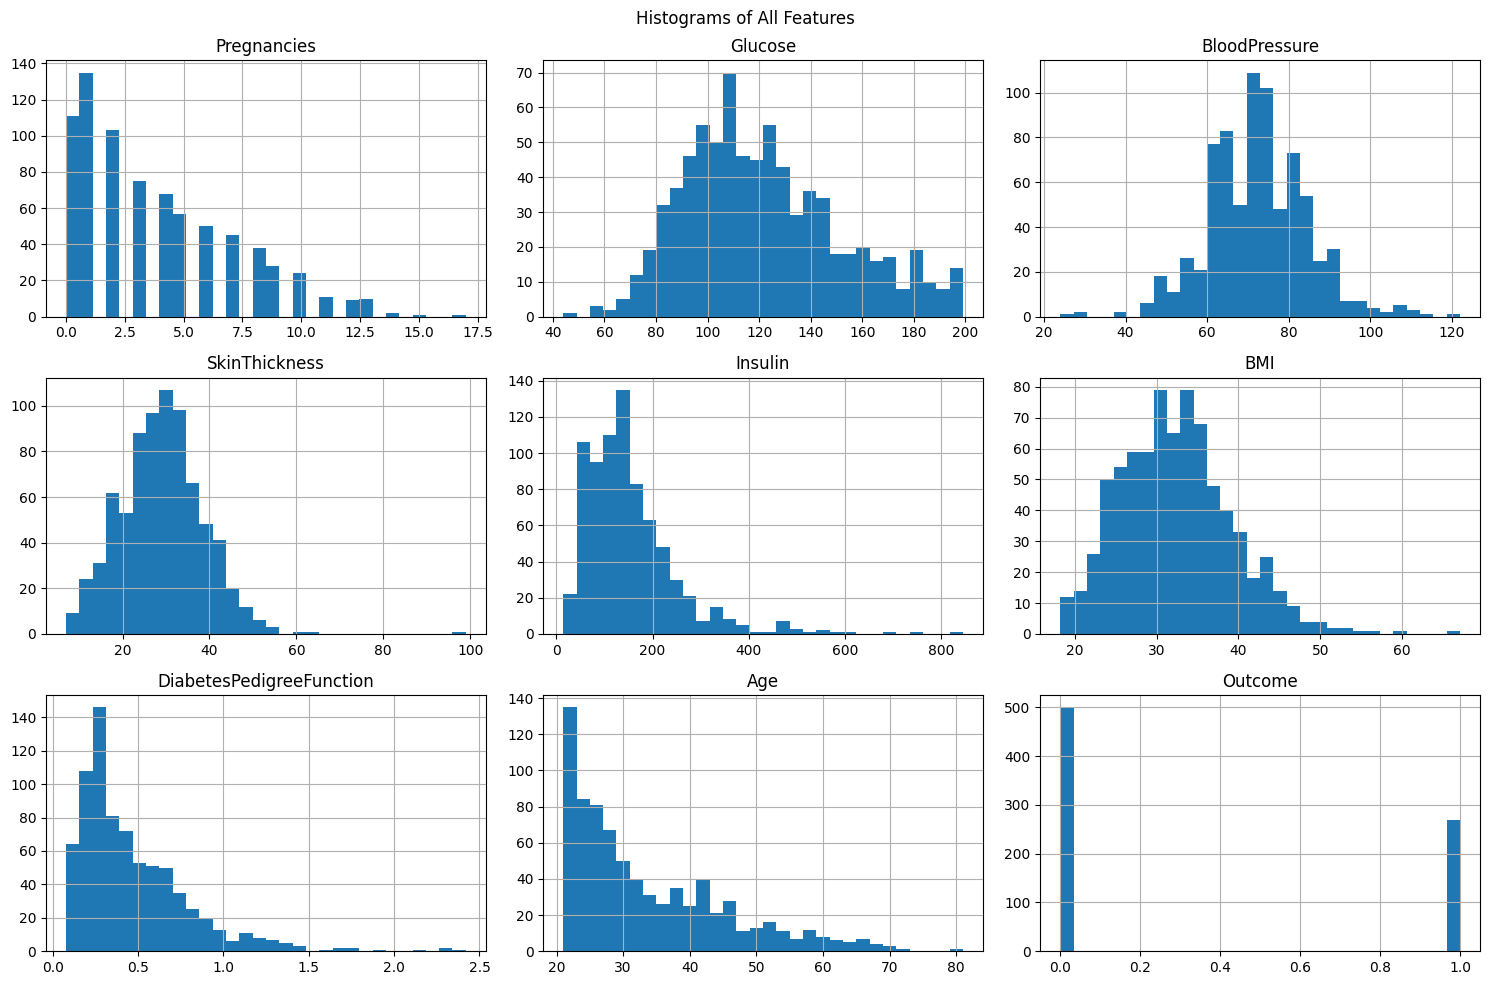

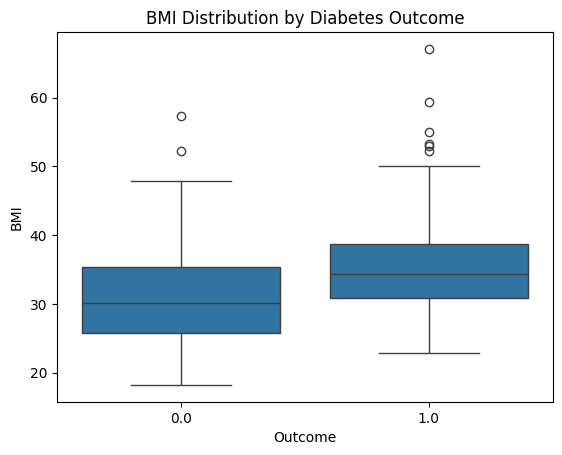

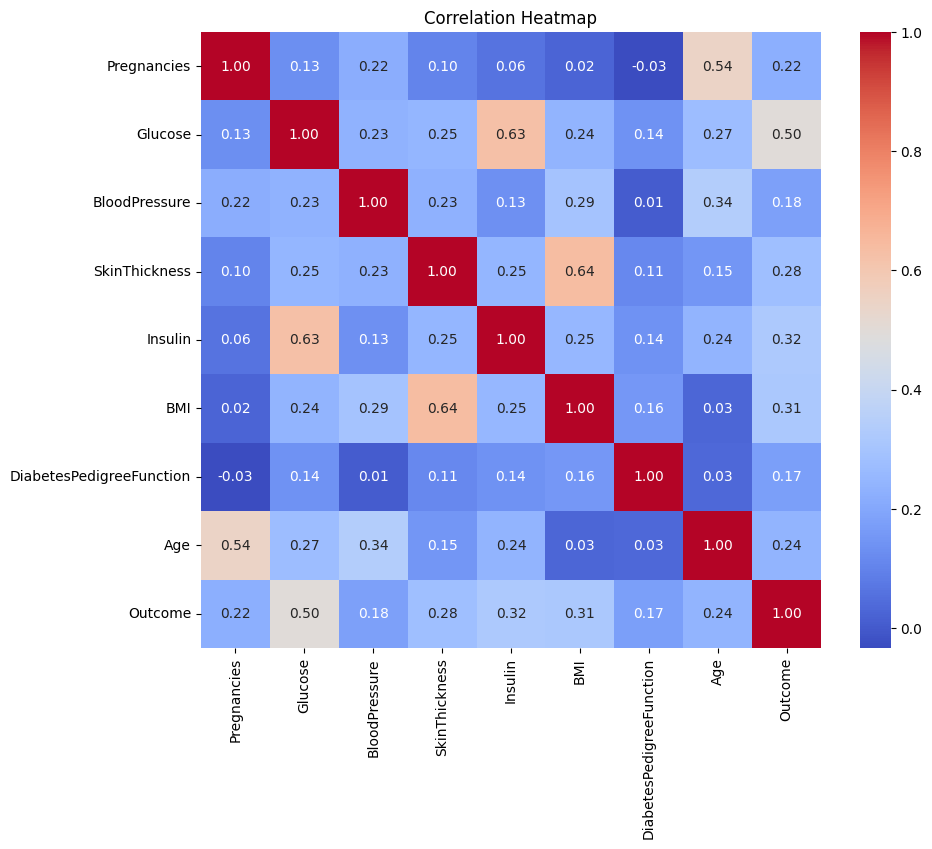


Original dataset size: 768
After removing outliers: 720


In [12]:
# Histogram
df_imputed.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of All Features")
plt.tight_layout()
plt.show()

# Box plot 
sns.boxplot(x='Outcome', y='BMI', data=df_imputed)
plt.title("BMI Distribution by Diabetes Outcome")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_imputed.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# 🧨 Step 6: Outlier Detection (Z-Score Method)
z_scores = np.abs(stats.zscore(df_imputed))
df_no_outliers = df_imputed[(z_scores < 3).all(axis=1)]

print(f"\nOriginal dataset size: {df.shape[0]}")
print(f"After removing outliers: {df_no_outliers.shape[0]}")


Obj 4. Outlier detection

In [11]:
z_scores = np.abs(stats.zscore(df_imputed))
df_no_outliers = df_imputed[(z_scores < 3).all(axis=1)]

print(f"\ndataset size: {df.shape[0]}")
print(f"After removing outliers: {df_no_outliers.shape[0]}")


dataset size: 768
After removing outliers: 720


Missing values before imputation:
 Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


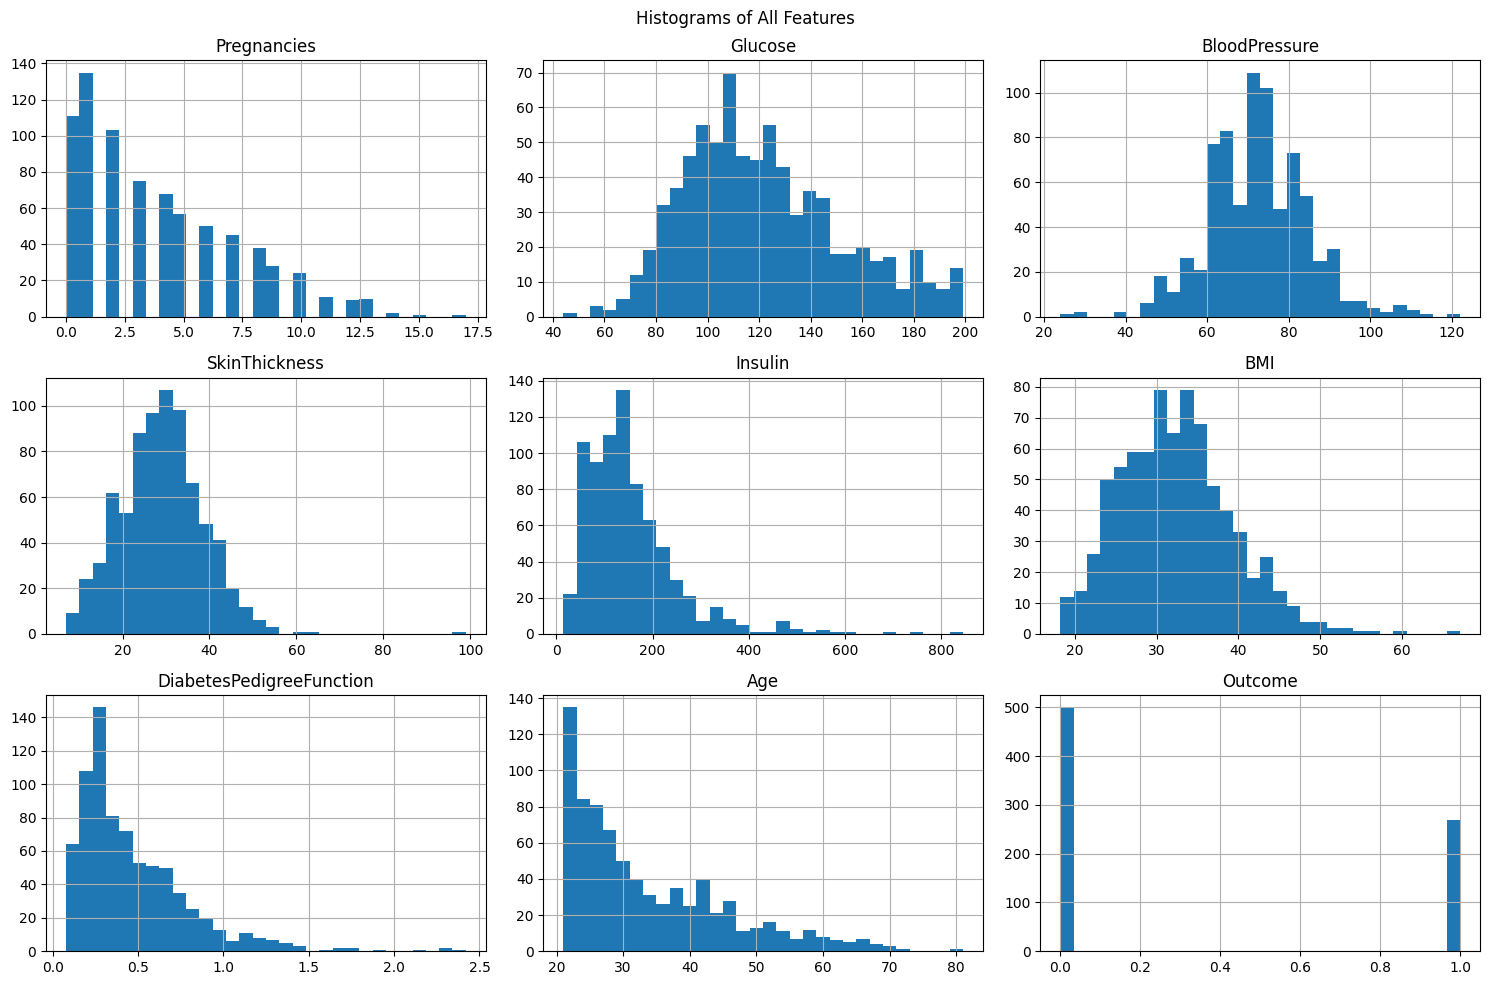

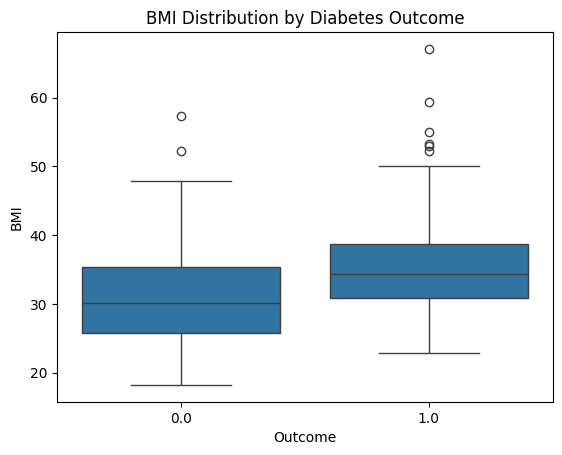

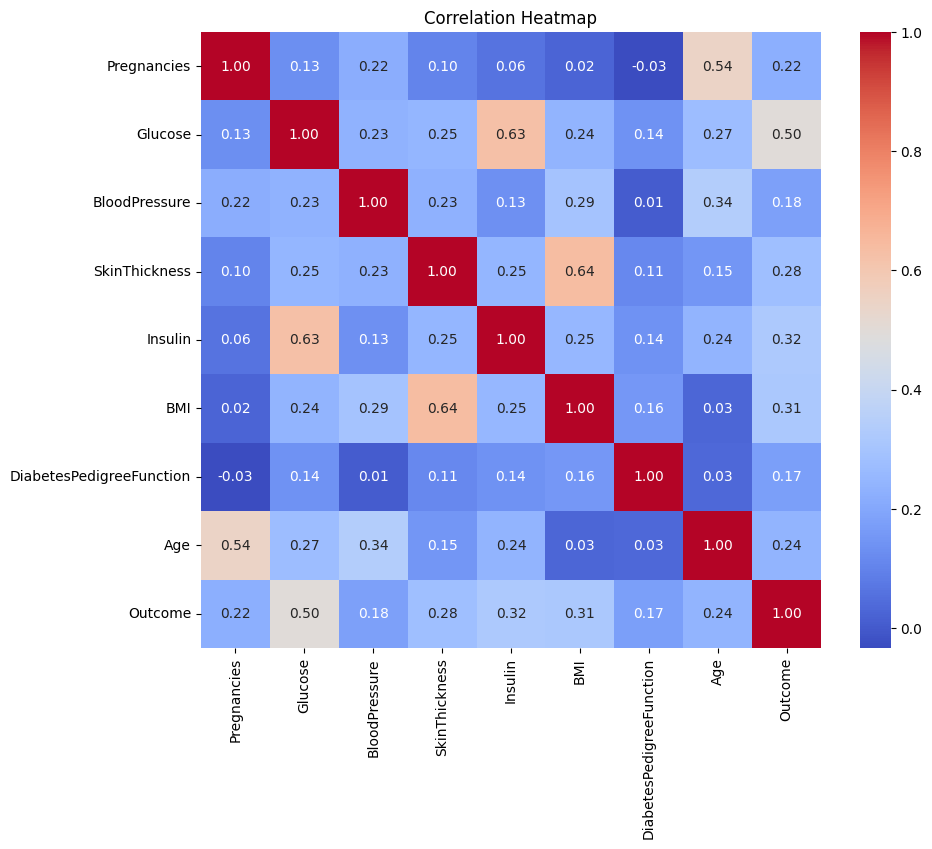


Original dataset size: 768
After removing outliers: 720


In [ ]:
# 📦 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy import stats
import os

'diabetes.csv'  


df = pd.read_csv('diabetes.csv' )

# 🧹 Step 3: Data Cleaning & Preprocessing
# Replace 0s with NaN in selected columns where 0 is not a valid value
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

# Display missing values count
print("Missing values before imputation:\n", df.isnull().sum())

# Step 4: Impute Missing Values using KNN
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# 🧪 Step 5: Exploratory Data Analysis (EDA)
# Histogram
df_imputed.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of All Features")
plt.tight_layout()
plt.show()

# Box plot of BMI by Outcome
sns.boxplot(x='Outcome', y='BMI', data=df_imputed)
plt.title("BMI Distribution by Diabetes Outcome")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_imputed.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# 🧨 Step 6: Outlier Detection (Z-Score Method)
z_scores = np.abs(stats.zscore(df_imputed))
df_no_outliers = df_imputed[(z_scores < 3).all(axis=1)]

print(f"\nOriginal dataset size: {df.shape[0]}")
print(f"After removing outliers: {df_no_outliers.shape[0]}")


5. Machine Learning Model Evaluation by comparison

In [13]:
# 🔍 Step 7: Machine Learning Model Evaluation

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# 🎯 Define features and target
X = df_no_outliers.drop('Outcome', axis=1)
y = df_no_outliers['Outcome']

# ✂️ Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📏 Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 🧠 Define classifiers to compare
models = {
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier()
}

# 📊 Train & Evaluate Each Model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n🔹 {name} Results:")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall   :", recall_score(y_test, y_pred))
    print("F1 Score :", f1_score(y_test, y_pred))



🔹 SVM Results:
Accuracy : 0.8194444444444444
Precision: 0.7297297297297297
Recall   : 0.627906976744186
F1 Score : 0.675

🔹 Random Forest Results:
Accuracy : 0.7986111111111112
Precision: 0.675
Recall   : 0.627906976744186
F1 Score : 0.6506024096385542

🔹 Naive Bayes Results:
Accuracy : 0.7638888888888888
Precision: 0.5849056603773585
Recall   : 0.7209302325581395
F1 Score : 0.6458333333333334

🔹 Decision Tree Results:
Accuracy : 0.7569444444444444
Precision: 0.5869565217391305
Recall   : 0.627906976744186
F1 Score : 0.6067415730337079


obj6.analyzed feature importance for diabetes prediction

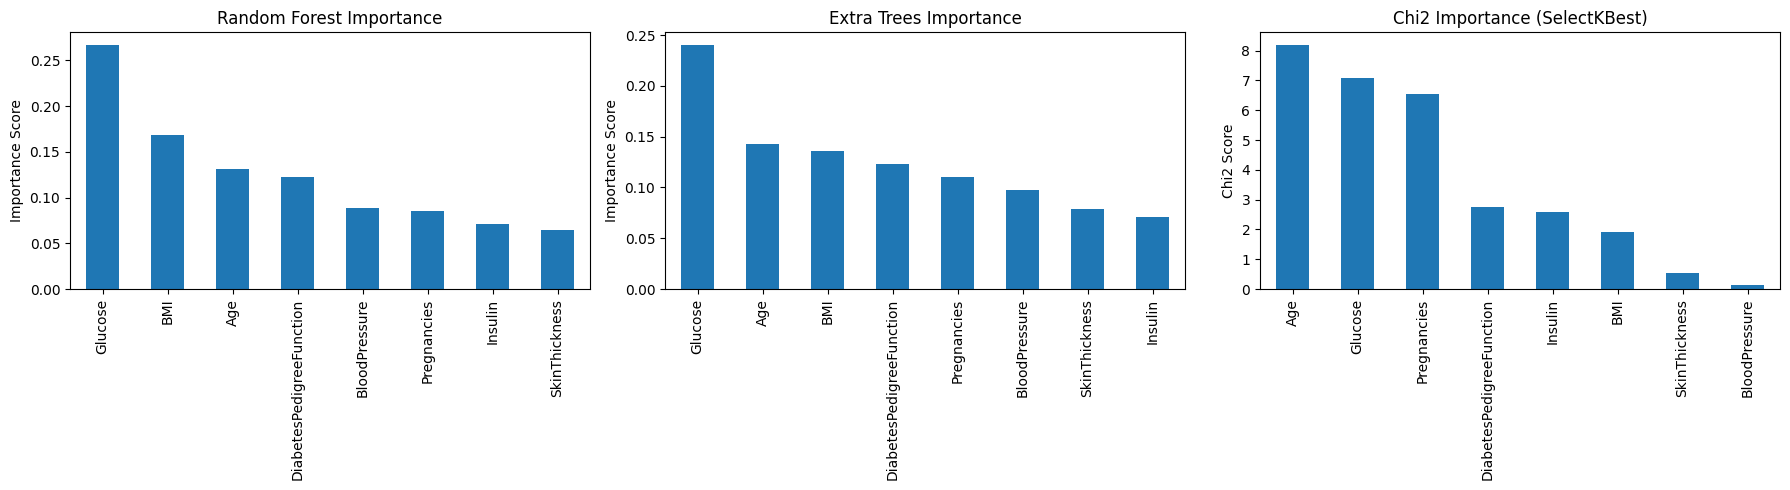

Top 3 Features by Random Forest: Glucose    0.267142
BMI        0.168769
Age        0.131567
dtype: float64
Top 3 Features by Extra Trees: Glucose    0.240687
Age        0.143071
BMI        0.135413
dtype: float64
Top 3 Features by Chi2: Age            8.205691
Glucose        7.094910
Pregnancies    6.559982
dtype: float64


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('diabetes.csv')

X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
importances_rf = pd.Series(rf.feature_importances_, index=X.columns)
importances_rf = importances_rf.sort_values(ascending=False)


etc = ExtraTreesClassifier(n_estimators=100, random_state=42)
etc.fit(X, y)
importances_etc = pd.Series(etc.feature_importances_, index=X.columns)
importances_etc = importances_etc.sort_values(ascending=False)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X_scaled, y)
importances_chi2 = pd.Series(selector.scores_, index=X.columns)
importances_chi2 = importances_chi2.sort_values(ascending=False)


plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
importances_rf.plot(kind='bar', title='Random Forest Importance')
plt.ylabel("Importance Score")

plt.subplot(1, 3, 2)
importances_etc.plot(kind='bar', title='Extra Trees Importance')
plt.ylabel("Importance Score")

plt.subplot(1, 3, 3)
importances_chi2.plot(kind='bar', title='Chi2 Importance (SelectKBest)')
plt.ylabel("Chi2 Score")

plt.tight_layout()
plt.show()

# Print top features for summary
print("Top 3 Features by Random Forest:", importances_rf.head(3))
print("Top 3 Features by Extra Trees:", importances_etc.head(3))
print("Top 3 Features by Chi2:", importances_chi2.head(3))


obj 7. Compare Model Training Time for Efficiency Analysis

In [ ]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

training_times = {}

for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_times[name] = end_time - start_time

print("Model Training Time: ")
for model_name, t in training_times.items():
    print(f"{model_name}: {t:.4f} seconds")


Model Training Time: 
Logistic Regression: 0.0037 seconds
K-Nearest Neighbors: 0.0014 seconds
Support Vector Machine: 0.0082 seconds
Decision Tree: 0.0038 seconds
Random Forest: 0.1307 seconds
